In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid19'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx


# Introduction

## About the data
> COVID-19 pandemic impacted the whole world, overwhelming healthcare systems - unprepared for such intense and lengthy request for ICU beds, professionals, personal protection equipment and healthcare resources.
Brazil recorded first COVID-19 case on February 26 and reached community transmission on March 20.

## The Task:
> Task 01
Predict admission to the ICU of confirmed COVID-19 cases.
Based on the data available, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide tertiary and quarternary hospitals with the most accurate answer, so ICU resources can be arranged or patient transfer can be scheduled.

In [2]:
# Import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
!pip install openpyxl  # Install openpyxl to load xlsx extension excel file

     |████████████████████████████████| 243 kB 865 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=ca9a4aacaf13e2e50485802c260b130c5305712d894201df1a5310b89533d38c
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [4]:
# Import dataset
df = pd.read_excel('../input/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

# Exploring Data

In [5]:
# Increase the number of rows and columns to deal with big dataset
pd.set_option('display.max_rows',300) # Set display rows to 300 
pd.set_option('display.max_columns',300) # Set Display columns to 300

In [6]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

> We need to clean up the data so that we omit every record that has `ICU = 1`  
But first we want to create a new column that identify if the patient eventually got to the ICU or not

In [7]:
# Create a dataframe that identify for every patient if any of its ICU values more than 0
ICU_admitted = (df.groupby('PATIENT_VISIT_IDENTIFIER').sum()['ICU'] > 0).reset_index()*1  #  '*1' to convert True/False to (1, 0)

In [8]:
ICU_admitted

,PATIENT_VISIT_IDENTIFIER,ICU
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
380,380,1
381,381,0
382,382,1
383,383,0


In [9]:
# Join the two dataframe and add '_admitted' to common ICU column
df = df.join(ICU_admitted.set_index('PATIENT_VISIT_IDENTIFIER'), on = 'PATIENT_VISIT_IDENTIFIER', rsuffix='_admitted')

In [10]:
# Delete any record that had `ICU = 1` and create it in `df_model`
df_model = df[df.ICU == 0]

In [11]:
# Drop columns 
df_model.drop( ['ICU', 'PATIENT_VISIT_IDENTIFIER'], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
patients_admitted = df_model[df_model.ICU_admitted == 1].value_counts().sum()/ len(df_model)
print('Percentage of patients admitted to ICU : {:.2f}%'.format (patients_admitted*100))


Percentage of patients admitted to ICU : 2.91%


## Missing Data

**As Stated in the data description we will try to fill nulls with perceding values**
> Tips & Tricks: It is reasonable to assume that a patient who does not have a measurement recorded in a time window is clinically stable, potentially presenting vital signs and blood labs similar to neighboring windows. Therefore, one may fill the missing values using the next or previous entry. Attention to multicollinearity and zero variance issues in this data when choosing your algorithm.

In [13]:
# Checking the proportions of Nulls
missing_props = df_model.isna().sum() / len(df_model)
missing_props[missing_props > 0].sort_values(ascending=False)

P02_VENOUS_MAX                      0.621986
PH_ARTERIAL_MIN                     0.621986
PC02_VENOUS_MAX                     0.621986
PC02_VENOUS_DIFF                    0.621986
PCR_MEDIAN                          0.621986
PCR_MEAN                            0.621986
PCR_MIN                             0.621986
PCR_MAX                             0.621986
PCR_DIFF                            0.621986
PH_ARTERIAL_MEDIAN                  0.621986
PH_ARTERIAL_MEAN                    0.621986
PH_ARTERIAL_MAX                     0.621986
PC02_VENOUS_MEAN                    0.621986
PH_ARTERIAL_DIFF                    0.621986
PH_VENOUS_MEDIAN                    0.621986
PH_VENOUS_MEAN                      0.621986
PH_VENOUS_MIN                       0.621986
PH_VENOUS_MAX                       0.621986
PH_VENOUS_DIFF                      0.621986
PLATELETS_MEDIAN                    0.621986
PLATELETS_MEAN                      0.621986
PLATELETS_MIN                       0.621986
PC02_VENOU

In [14]:
df_model.fillna(method='ffill', inplace = True) # ffill forward filling of nulls
df_model.fillna(method='bfill', inplace = True) # bfill backward filling of nulls for the values in the first rows

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
df_model.isna().sum().all() # Checking for any remaining nulls

False

In [16]:
# Check duplicated values
df_model.duplicated().sum()

1

In [17]:
df_model.dropna(inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Ensure the consistency of all labels 
df_model.columns = df_model.columns.str.replace(' ', '_')

In [19]:
# Convert AGE_PERCENTIL into numbers
df_model.AGE_PERCENTIL = df_model.AGE_PERCENTIL.apply(lambda x : int(x.replace('th', '').strip('Above ')))

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df_model.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1924
Data columns (total 230 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    AGE_ABOVE65                       int64  
 1    AGE_PERCENTIL                     int64  
 2    GENDER                            int64  
 3    DISEASE_GROUPING_1                float64
 4    DISEASE_GROUPING_2                float64
 5    DISEASE_GROUPING_3                float64
 6    DISEASE_GROUPING_4                float64
 7    DISEASE_GROUPING_5                float64
 8    DISEASE_GROUPING_6                float64
 9    HTN                               float64
 10   IMMUNOCOMPROMISED                 float64
 11   OTHER                             float64
 12   ALBUMIN_MEDIAN                    float64
 13   ALBUMIN_MEAN                      float64
 14   ALBUMIN_MIN                       float64
 15   ALBUMIN_MAX                       float64
 16   ALBUMIN_DIFF          

In [21]:
# Create dataframe with only data in the first window '0-2'
df_model_0_2_window = df_model[df_model.WINDOW == '0-2']
df_model_0_2_window.drop('WINDOW', axis = 1, inplace = True)
df_model_0_2_window = pd.get_dummies(df_model_0_2_window, columns= ['AGE_PERCENTIL'], drop_first = True) # Create dummies

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
# Create dataframe with only data in the first window '0-4'
df_model_0_4_window = df_model[(df_model.WINDOW == '0-2') | (df_model.WINDOW == '2-4')]
df_model_0_4_window.drop('WINDOW', axis = 1, inplace = True)
df_model_0_4_window = pd.get_dummies(df_model_0_4_window, columns= ['AGE_PERCENTIL'], drop_first = True) # Create dummies

In [23]:
# Create dataframe with only data in the first window '0-6'
df_model_0_6_window = df_model[(df_model.WINDOW == '0-2') | (df_model.WINDOW == '2-4')
                               | (df_model.WINDOW == '4-6')]
df_model_0_6_window.drop('WINDOW', axis = 1, inplace = True)
df_model_0_6_window = pd.get_dummies(df_model_0_6_window, columns= ['AGE_PERCENTIL'], drop_first = True) # Create dummies

In [24]:
# Create dummies for df_model
df_model = pd.get_dummies(df_model, columns= ['WINDOW', 'AGE_PERCENTIL'], drop_first= True)

In [25]:
df_model

,AGE_ABOVE65,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU_admitted,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AGE_PERCENTIL_20,AGE_PERCENTIL_30,AGE_PERCENTIL_40,AGE_PERCENTIL_50,AGE_PERCENTIL_60,AGE_PERCENTIL_70,AGE_PERCENTIL_80,AGE_PERCENTIL_90
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0

# Multicolinearity Check

The following code is useful to check multicolinearity by checking the "Variable Infliteration Factor"  
This can take too long to run, So I converted it to docstring

In [26]:
"""
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('ICU_admitted~'+'+'.join(df_model.columns[:-1]), df_model, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)[vif['VIF Factor'] > 10]
"""

'\nfrom patsy import dmatrices\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\ny, X = dmatrices(\'ICU_admitted~\'+\'+\'.join(df_model.columns[:-1]), df_model, return_type = \'dataframe\')\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\nvif.round(1)[vif[\'VIF Factor\'] > 10]\n'

## **Using all windows parameter to build Scikit Learn Random Forest Classification Model**

In [27]:
def model(df):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    df_test = df.copy()
    target = 'ICU_admitted'
    y = df_test.pop(target)
    X = df_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    clf = RandomForestClassifier(max_depth=30, n_estimators=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Record Model Metrix
    print("Accuracy:{:.6f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision:{:.6f}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall:{:.6f}".format(metrics.recall_score(y_test, y_pred)))
    
    # Print Confusion Matrix
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)) 
    sb.heatmap(confusion_matrix, annot=True, cmap="Blues")
    
    return metrics.accuracy_score(y_test, y_pred)

### Create model for all windows

Accuracy:0.896226
Precision:0.840580
Recall:0.840580


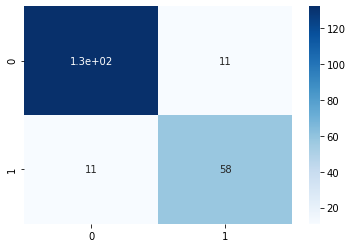

In [28]:
score_all = model(df_model)

### Create model for Window from 0-2

Accuracy:0.509434
Precision:0.521739
Recall:0.444444


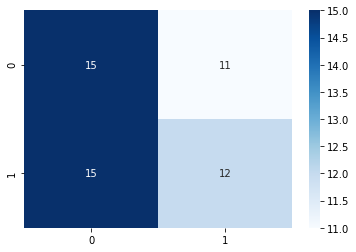

In [29]:
score_window_0_2 = model(df_model_0_2_window)

### Create model for Window from 0-4

Accuracy:0.764706
Precision:0.812500
Recall:0.590909


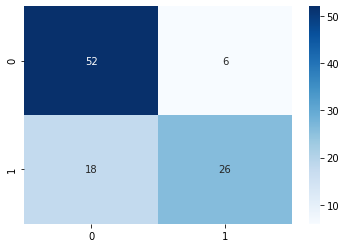

In [30]:
score_window_0_4 = model(df_model_0_4_window)

### Create model for Window from 0-6

Accuracy:0.848276
Precision:0.826923
Recall:0.767857


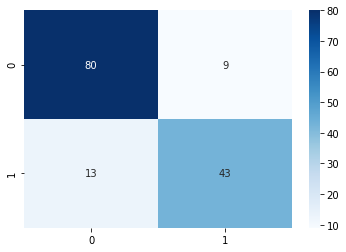

In [31]:
score_window_0_6 = model(df_model_0_6_window)

### Compare Models for different windows

<BarContainer object of 4 artists>

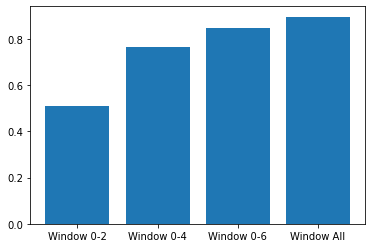

In [32]:
plt.bar(['Window 0-2', 'Window 0-4', 'Window 0-6', 'Window All'], 
        [score_window_0_2, score_window_0_4, score_window_0_6, score_all])

# Conculsions

We have got a good model using Random Forest Classifier and all windows. The window from 0-2 though has got very poor predictability.